<a href="https://colab.research.google.com/github/gluoneros/talentoTech/blob/main/talentoTech_Mision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
===


# **Clase 25/09**


#Regresión Lineal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnshTanwar/Global-Data-on-Sustainable-Energy/refs/heads/main/global-data-on-sustainable-energy%20(1).csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

##Imputando valores faltantes con la mediana

In [ ]:
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].median(), inplace=True)
df['gdp_per_capita'].fillna(df['gdp_per_capita'].median(), inplace=True)

<ipython-input-11-d25bcf02e3ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].median(), inplace=True)
<ipython-input-11-d25bcf02e3ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [ ]:
df['Access to clean fuels for cooking'].fillna(df['Access to clean fuels for cooking'].median(), inplace=True)
df['Primary energy consumption per capita (kWh/person)'].fillna(df['Primary energy consumption per capita (kWh/person)'].median(), inplace=True)

<ipython-input-12-1824d14ffcc1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Access to clean fuels for cooking'].fillna(df['Access to clean fuels for cooking'].median(), inplace=True)
<ipython-input-12-1824d14ffcc1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [ ]:
df.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),0
Access to clean fuels for cooking,0
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),194
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


## Preprocesamiento de datos para el modelo

In [ ]:
# Preprocesamiento de datos para el modelo
X = df[['gdp_per_capita']]
y = df['Access to electricity (% of population)']

# Dividir mis registros en segmentos de entrenamiento y prueba

In [ ]:
# Dividir mis registros en segmentos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=15)

## Entrenar mi modelo

In [ ]:
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

LinearRegression()

In [ ]:
# realizar predicciones
y_predicciones = modelo.predict(X_prueba)

In [ ]:
#calcular del r2
r2 = modelo.score(X_prueba, y_prueba)
print("R2:", r2)


R2: 0.15726034036761372


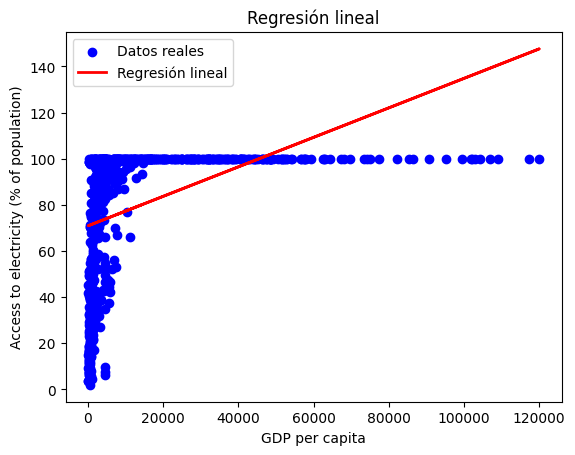

In [ ]:
plt.scatter(X_prueba, y_prueba, color='blue', label='Datos reales')
plt.plot(X_prueba, y_predicciones, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('GDP per capita')
plt.ylabel('Access to electricity (% of population)')
plt.title('Regresión lineal')
plt.legend()
plt.show()

In [ ]:
nuevos_datos = pd.DataFrame({'gdp_per_capita': [10000, 20000, 30000]})
predicciones = modelo.predict(nuevos_datos)
print(predicciones)

[77.23661142 83.63276699 90.02892256]


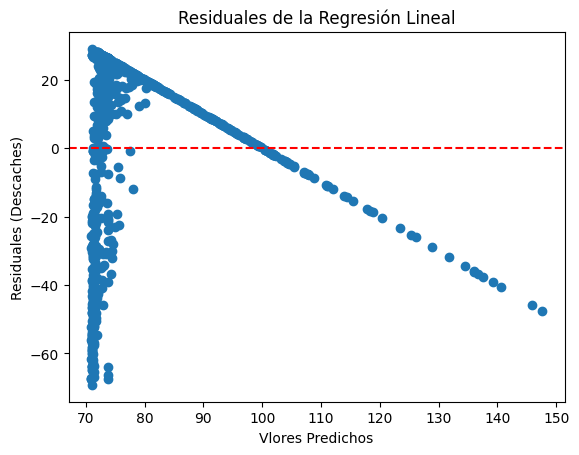

In [ ]:
# Calcular los residuales
residuales = y_prueba - y_predicciones

# Visualizar los residuales
plt.scatter(y_predicciones, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Vlores Predichos')
plt.ylabel('Residuales (Descaches)')
plt.title('Residuales de la Regresión Lineal')
plt.show()

## Tratando de mejorar el modelo

In [ ]:
X_multi = df[['gdp_per_capita', 'Primary energy consumption per capita (kWh/person)', 'Access to clean fuels for cooking']]

X_entrenamiento_multi, X_prueba_multi, y_entrenamiento_multi, y_prueba_multi = train_test_split(X_multi, y, test_size=0.2, random_state=15)

modelo_multi = LinearRegression()
modelo_multi.fit(X_entrenamiento_multi, y_entrenamiento_multi)

y_predicciones_multi = modelo_multi.predict(X_prueba_multi)

r2_multi = modelo_multi.score(X_prueba_multi, y_prueba_multi)
print("R2:", r2_multi)

R2: 0.711168891787554


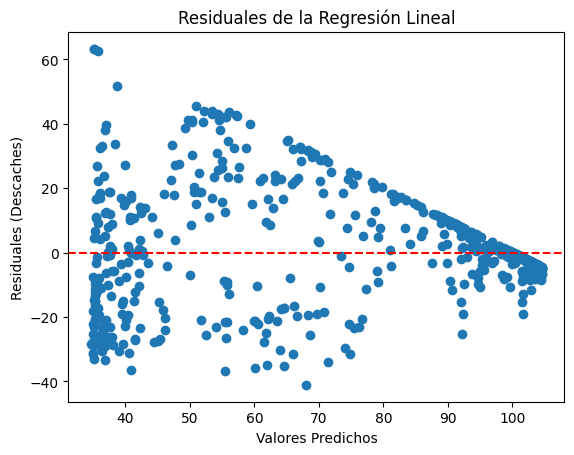

In [ ]:
residuales = y_prueba_multi - y_predicciones_multi

plt.scatter(y_predicciones_multi, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales (Descaches)')
plt.title('Residuales de la Regresión Lineal')
plt.show()

---
---
===


# **Clase 26/09**

# Regresión Logística

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
df['Access to electricity (% of population)'] = pd.to_numeric(df['Access to electricity (% of population)'])
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].mean(), inplace=True)

df['Access to clean fuels for cooking'] = pd.to_numeric(df['Access to clean fuels for cooking'])
df['Access to clean fuels for cooking'].fillna(df['Access to clean fuels for cooking'].mean(), inplace=True)

df['Renewable energy share in the total final energy consumption (%)'] = pd.to_numeric(df['Renewable energy share in the total final energy consumption (%)'])
df['Renewable energy share in the total final energy consumption (%)'].fillna(df['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)
df['Renewable energy share in the total final energy consumption (%)']

<ipython-input-28-ec13c33897fc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].mean(), inplace=True)
<ipython-input-28-ec13c33897fc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,Renewable energy share in the total final energy consumption (%)
0,44.99
1,45.60
2,37.83
3,36.66
4,44.24
...,...
3644,81.90
3645,82.46
3646,80.23
3647,81.50


In [ ]:
df['Accesso > 50%'] = df['Access to electricity (% of population)'].apply(lambda x: 1 if x > 50 else 0 )

In [ ]:
x1 = df[['Renewable energy share in the total final energy consumption (%)', 'Access to clean fuels for cooking']]
y1 = df['Accesso > 50%']
x1

,Renewable energy share in the total final energy consumption (%),Access to clean fuels for cooking
0,44.99,6.2
1,45.60,7.2
2,37.83,8.2
3,36.66,9.5
4,44.24,10.9
...,...,...
3644,81.90,29.8
3645,82.46,29.8
3646,80.23,29.9
3647,81.50,30.1


In [ ]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [ ]:
modelo = LogisticRegression()
modelo.fit(x_entrenamiento, y_entrenamiento )

LogisticRegression()

In [ ]:
y_predicciones = modelo.predict(x_prueba)

In [ ]:
accuracy = modelo.score(x_prueba, y_prueba)
print("Ajuste. R2:", accuracy)

Ajuste. R2: 0.9205479452054794


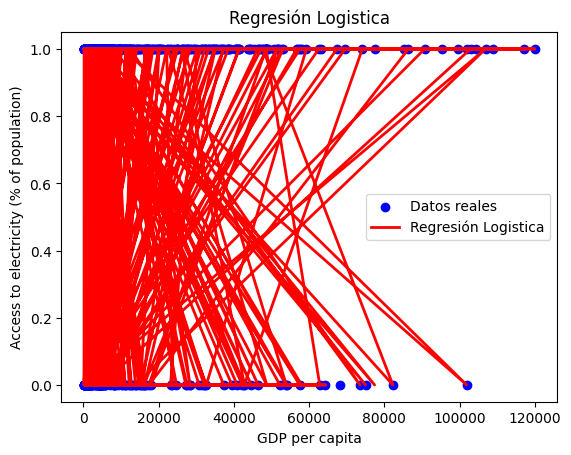

In [ ]:
plt.scatter(X_prueba, y_prueba, color='blue', label='Datos reales')
plt.plot(X_prueba, y_predicciones, color='red', linewidth=2, label='Regresión Logistica')
plt.xlabel('GDP per capita')
plt.ylabel('Access to electricity (% of population)')
plt.title('Regresión Logistica')
plt.legend()
plt.show()

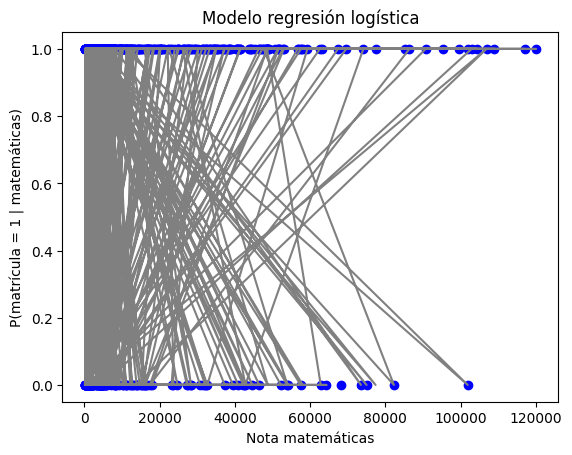

In [ ]:
plt.scatter(X_prueba, y_prueba, color='blue', label='Datos reales')
#plt.plot(X_prueba, y_predicciones, color='red', linewidth=2, label='Regresión Logistica')

plt.plot(X_prueba, y_predicciones, color = "gray")

plt.title("Modelo regresión logística")
plt.ylabel("P(matrícula = 1 | matemáticas)")
plt.xlabel("Nota matemáticas")
plt.show()


In [ ]:
matrix_confusion = confusion_matrix(y_prueba, y_predicciones)
print("Matriz de Confusión:")
print(matrix_confusion)

Matriz de Confusión:
[[119  27]
 [ 31 553]]


In [ ]:
y_probabilidades = modelo.predict_proba(x_prueba)[:, 1]

fpr, tpr, thresholds = roc_curve(y_prueba, y_probabilidades)

curva_roc = roc_auc_score(y_prueba, y_probabilidades)
print("Curva ROC AUC:", curva_roc)

Curva ROC AUC: 0.9645454118971666


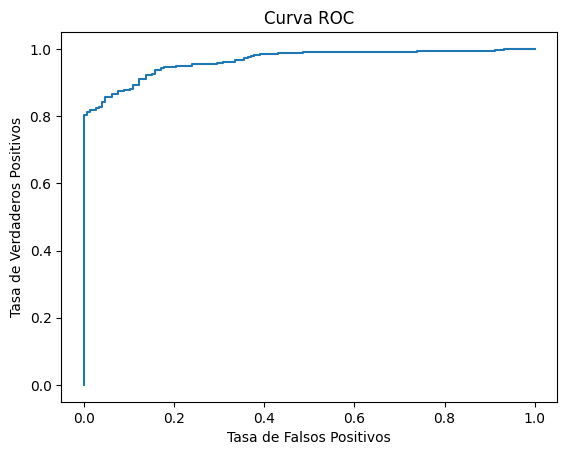

In [ ]:
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % curva_roc)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()


---
---
===


# **Clase 27/09**

# Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnshTanwar/Global-Data-on-Sustainable-Energy/refs/heads/main/global-data-on-sustainable-energy%20(1).csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
df['Renewable energy share in the total final energy consumption (%)'] = pd.to_numeric(df['Renewable energy share in the total final energy consumption (%)'])
df['Renewable energy share in the total final energy consumption (%)'].fillna(df['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)
df['Renewable energy share in the total final energy consumption (%)'].value_counts()

,count
Renewable energy share in the total final energy consumption (%),
32.638165,194
0.000000,95
0.010000,32
0.070000,13
0.050000,10
...,...
48.620000,1
48.950000,1
53.170000,1


In [ ]:
df['Electricity from fossil fuels (TWh)'] = pd.to_numeric(df['Electricity from fossil fuels (TWh)'])
df['Electricity from fossil fuels (TWh)'].fillna(df['Electricity from fossil fuels (TWh)'].mean(), inplace=True)
df['Electricity from fossil fuels (TWh)'].isnull().sum()

0

In [ ]:
df['Access to electricity (% of population)'] = pd.to_numeric(df['Access to electricity (% of population)'])
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].mean(), inplace=True)
df['Access to electricity (% of population)']

,Access to electricity (% of population)
0,1.613591
1,4.074574
2,9.409158
3,14.738506
4,20.064968
...,...
3644,42.561730
3645,44.178635
3646,45.572647
3647,46.781475


In [ ]:
df.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),0
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),0
Electricity from fossil fuels (TWh),0
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


In [ ]:
df['Accesso > 50%'] = df['Access to electricity (% of population)'].apply(lambda x: 1 if x > 50 else 0 )

In [ ]:
x = df[['Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)']].values
y = df['Accesso > 50%']

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=15)

print(np.isnan(x).sum())


0


In [ ]:
modelo = GaussianNB()
modelo.fit(x_entrenamiento, y_entrenamiento)

GaussianNB()

In [ ]:
y_predicciones = modelo.predict(x_prueba)

In [ ]:
accuracy = accuracy_score(y_prueba, y_predicciones)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7794520547945205


In [ ]:
matrix_confusion = confusion_matrix(y_prueba, y_predicciones)
print("Matriz de Confusión:")
print(matrix_confusion)

Matriz de Confusión:
[[152   3]
 [158 417]]


<Axes: >

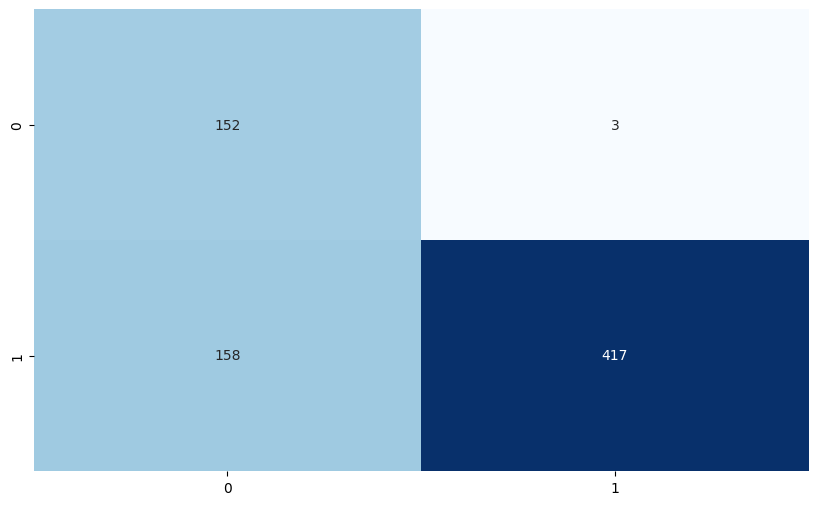

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

In [ ]:
y_probabilidades = modelo.predict_proba(x_prueba)[:, 1]

fpr, tpr, thresholds = roc_curve(y_prueba, y_probabilidades)

curva_roc = roc_auc_score(y_prueba, y_probabilidades)
print("Curva ROC AUC:", curva_roc)


Curva ROC AUC: 0.936819074333801


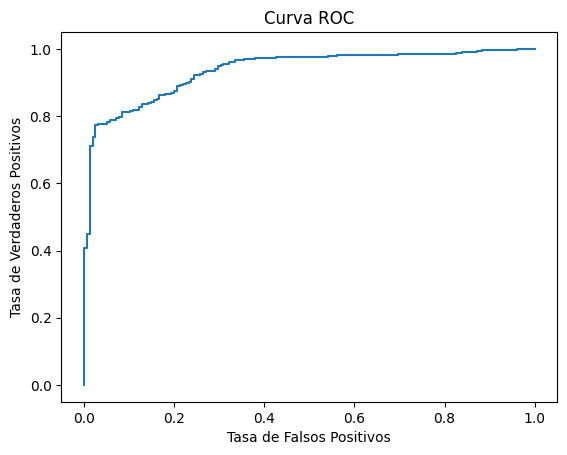

In [ ]:
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % curva_roc)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

---
---
===


# **Clase 30/09**

##Decision trees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import tree as cl

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/An
shTanwar/Global-Data-on-Sustainable-Energy/refs/heads/main/global-data-on-sustainable-energy%20(1).csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
df['Renewable energy share in the total final energy consumption (%)'] = pd.to_numeric(df['Renewable energy share in the total final energy consumption (%)'])
df['Renewable energy share in the total final energy consumption (%)'].fillna(df['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)
df['Renewable energy share in the total final energy consumption (%)'].value_counts()

,count
Renewable energy share in the total final energy consumption (%),
32.638165,194
0.000000,95
0.010000,32
0.070000,13
0.050000,10
...,...
48.620000,1
48.950000,1
53.170000,1


In [ ]:
df['Access to electricity (% of population)'] = pd.to_numeric(df['Access to electricity (% of population)'])
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].mean(), inplace=True)
df['Access to electricity (% of population)']

,Access to electricity (% of population)
0,1.613591
1,4.074574
2,9.409158
3,14.738506
4,20.064968
...,...
3644,42.561730
3645,44.178635
3646,45.572647
3647,46.781475


In [ ]:
df.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),0
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),0
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


In [ ]:
df['Accesso > 50%'] = df['Access to electricity (% of population)'].apply(lambda x: 1 if x > 50 else 0 )

In [ ]:
x = df[['Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)']].values
y = df['Accesso > 50%']

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=15)

print(np.isnan(x).sum())


21


In [ ]:


modelo = tree.DecisionTreeClassifier()
modelo.fit(x_entrenamiento, y_entrenamiento)

DecisionTreeClassifier()

In [ ]:
y_predicciones = modelo.predict(x_prueba)

In [ ]:
accuracy = accuracy_score(y_prueba, y_predicciones)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


In [ ]:
matrix_confusion = confusion_matrix(y_prueba, y_predicciones)
print("Matriz de Confusión:")
print(matrix_confusion)

Matriz de Confusión:
[[114  41]
 [ 32 543]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_prueba, y_predicciones)
roc_auc = roc_auc_score(y_prueba, y_predicciones)

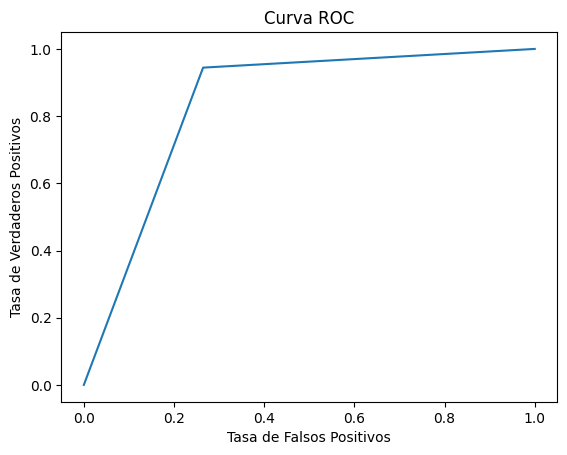

In [ ]:
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

In [ ]:
nuevos_datos = [[40,8,200]]

##Support Vector Machines svc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
df['Renewable energy share in the total final energy consumption (%)'] = pd.to_numeric(df['Renewable energy share in the total final energy consumption (%)'])
df['Renewable energy share in the total final energy consumption (%)'].fillna(df['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)
df['Renewable energy share in the total final energy consumption (%)'].value_counts()

,count
Renewable energy share in the total final energy consumption (%),
32.638165,194
0.000000,95
0.010000,32
0.070000,13
0.050000,10
...,...
48.620000,1
48.950000,1
53.170000,1


In [ ]:
df['Access to electricity (% of population)'] = pd.to_numeric(df['Access to electricity (% of population)'])
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].mean(), inplace=True)
df['Access to electricity (% of population)']

,Access to electricity (% of population)
0,1.613591
1,4.074574
2,9.409158
3,14.738506
4,20.064968
...,...
3644,42.561730
3645,44.178635
3646,45.572647
3647,46.781475


In [ ]:
df['Accesso > 50%'] = df['Access to electricity (% of population)'].apply(lambda x: 1 if x > 50 else 0 )

In [ ]:
x = df[['Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)']].values
y = df['Accesso > 50%']



print(np.isnan(x).sum())

21


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score



imputer = SimpleImputer(strategy='mean')  # Create an imputer object
x = df[['Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)']]

x = imputer.fit_transform(x)  # Fit and transform to fill NaN values


y = df['Accesso > 50%']
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=15)

In [ ]:
modelo = SVC()
modelo.fit(x_entrenamiento, y_entrenamiento)

SVC()

---
---
===


# **Clase 01/10/24**

## Support Vector Machien

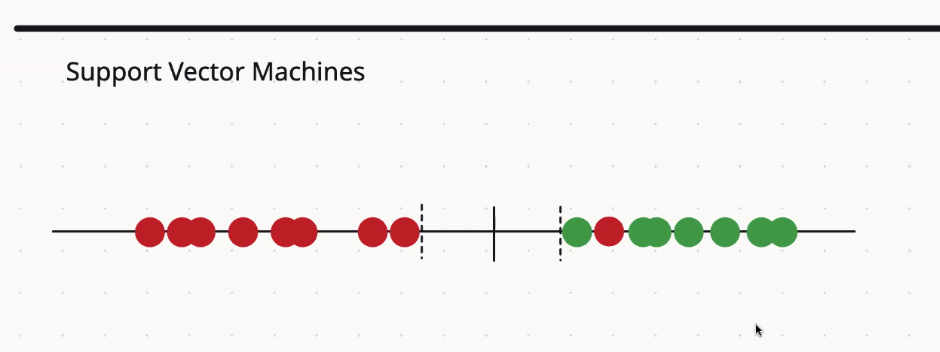

## K-means


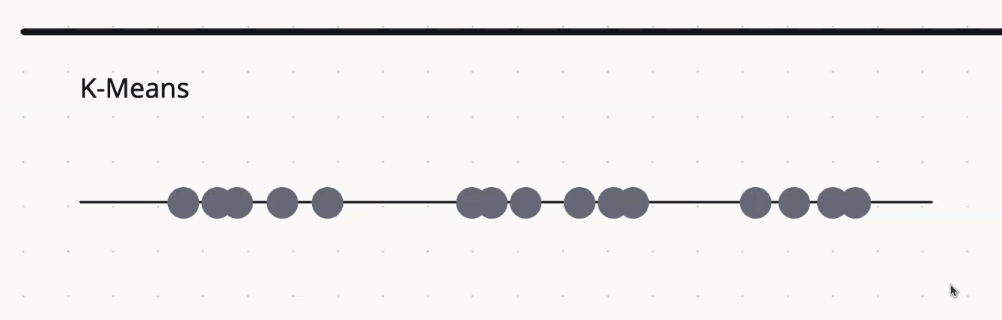



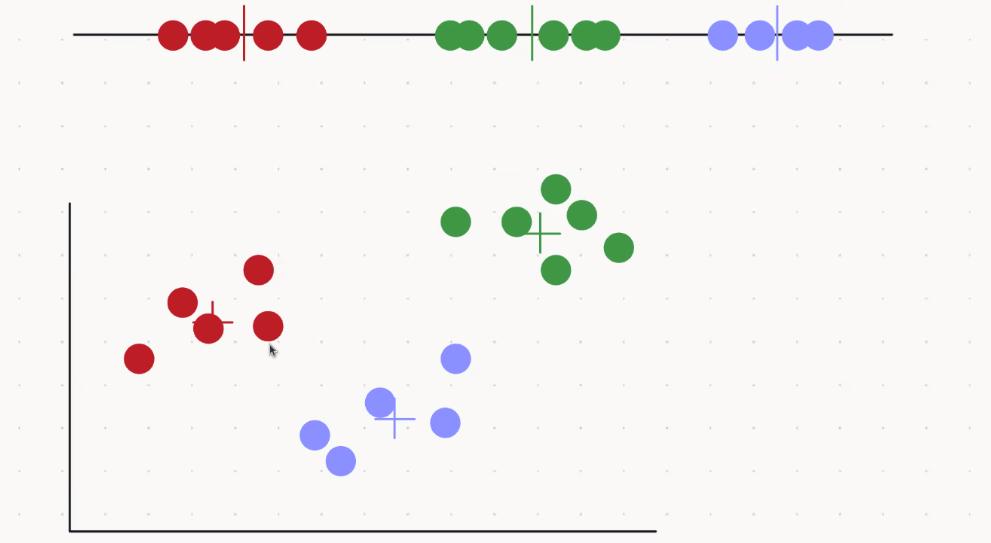

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
nro_registros = 300
nro_features = 2
nro_cluster = 4

x1, x2 = make_blobs(n_samples=nro_registros, n_features=nro_features, centers=nro_cluster, random_state=15)

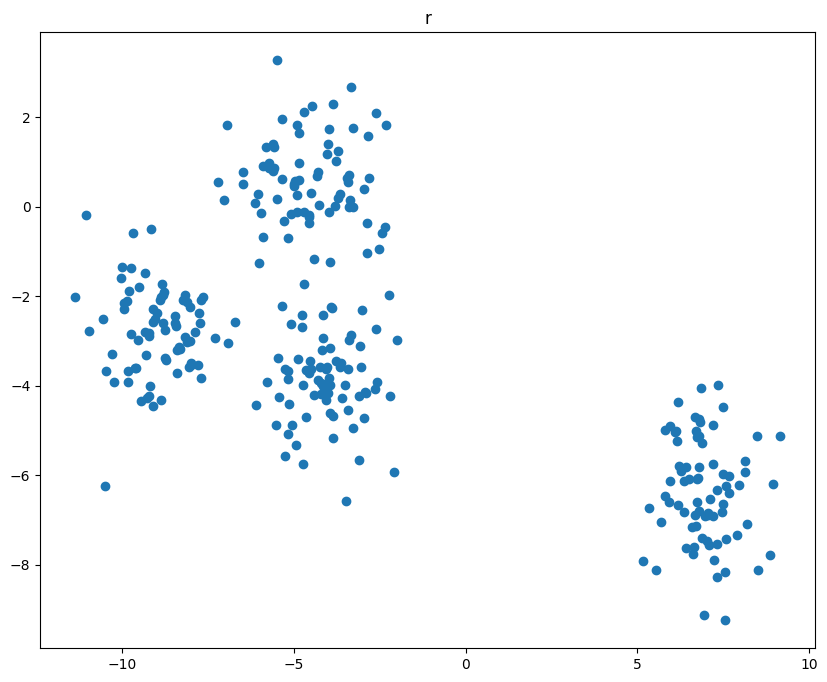

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(x1[:, 0], x1[:, 1])
plt.title('r')
plt.show()



In [ ]:
modelo_kmeans = KMeans(n_clusters=nro_cluster, random_state=42)
modelo_kmeans.fit(x1)

KMeans(n_clusters=4, random_state=42)

In [ ]:
predicciones = modelo_kmeans.predict(x1)
predicciones

array([2, 2, 3, 3, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 3, 3, 2, 1, 2, 0, 1, 1,
       1, 2, 3, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 3, 0, 0, 3, 0, 2, 3, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 2, 1, 3, 3, 1, 2,
       2, 0, 3, 3, 1, 2, 2, 1, 0, 1, 2, 2, 3, 1, 3, 1, 3, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 3, 2, 2, 3, 3, 1, 3, 2, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 1, 1, 1, 2, 3, 0, 0, 1, 3, 1, 2, 3, 0, 2, 1, 1, 3, 2,
       1, 3, 3, 1, 2, 1, 1, 2, 3, 2, 2, 0, 0, 3, 1, 2, 1, 2, 1, 0, 0, 0,
       2, 2, 3, 3, 1, 2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 3, 1, 1, 3, 3, 1, 3,
       2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 2, 3, 3, 2, 1, 0, 2, 3,
       2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 0, 3, 1, 0,
       2, 3, 3, 0, 0, 2, 1, 3, 0, 3, 3, 0, 0, 1, 3, 0, 0, 3, 1, 1, 1, 2,
       0, 0, 0, 3, 1, 0, 1, 2, 1, 1, 1, 1, 0, 3, 0, 2, 3, 2, 1, 1, 1, 0,
       2, 1, 0, 0, 2, 3, 3, 2, 2, 0, 1, 0, 2, 3, 3, 0, 1, 2, 1, 3, 2, 1,
       0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0], d

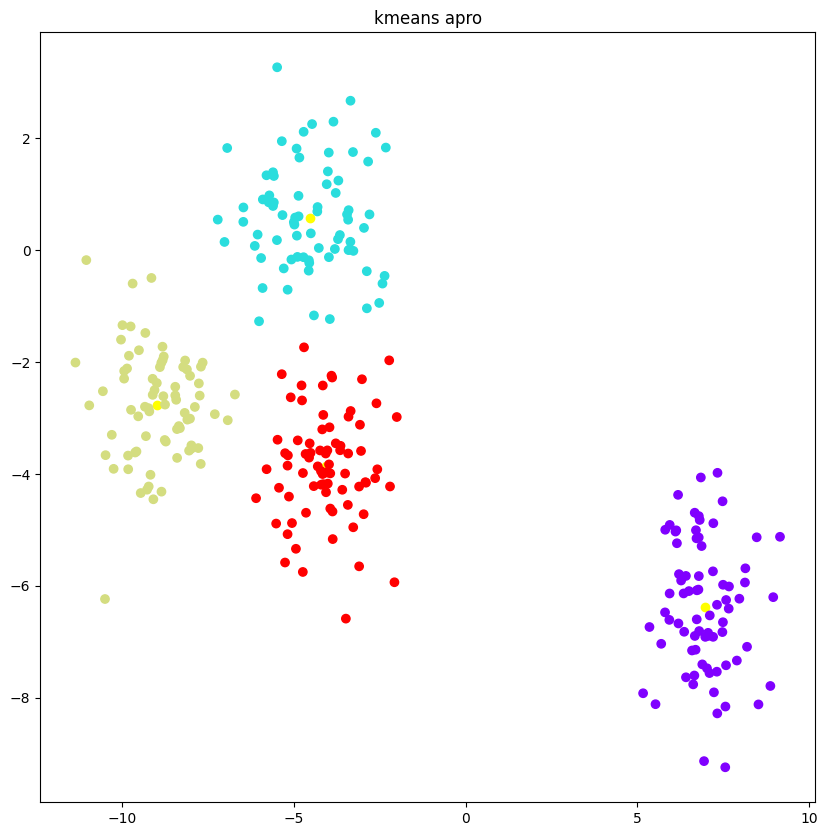

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], color='yellow', label='centroides')
plt.scatter(x1[:, 0], x1[:, 1], c=predicciones, cmap='rainbow')
plt.title('kmeans apro')
plt.show()


In [ ]:
wcss = []
for i in range(1, 11):
    modelo_kmeans = KMeans(n_clusters=i, random_state=42)
    modelo_kmeans.fit(x1)
    wcss.append(modelo_kmeans.inertia_)

In [ ]:
wcss


[12825.497514630873,
 2511.00985750432,
 1350.1547899413347,
 600.6043280097718,
 525.0214822165372,
 481.80180504949817,
 436.4335449296935,
 366.18919397741354,
 335.1542960032992,
 311.934947628156]

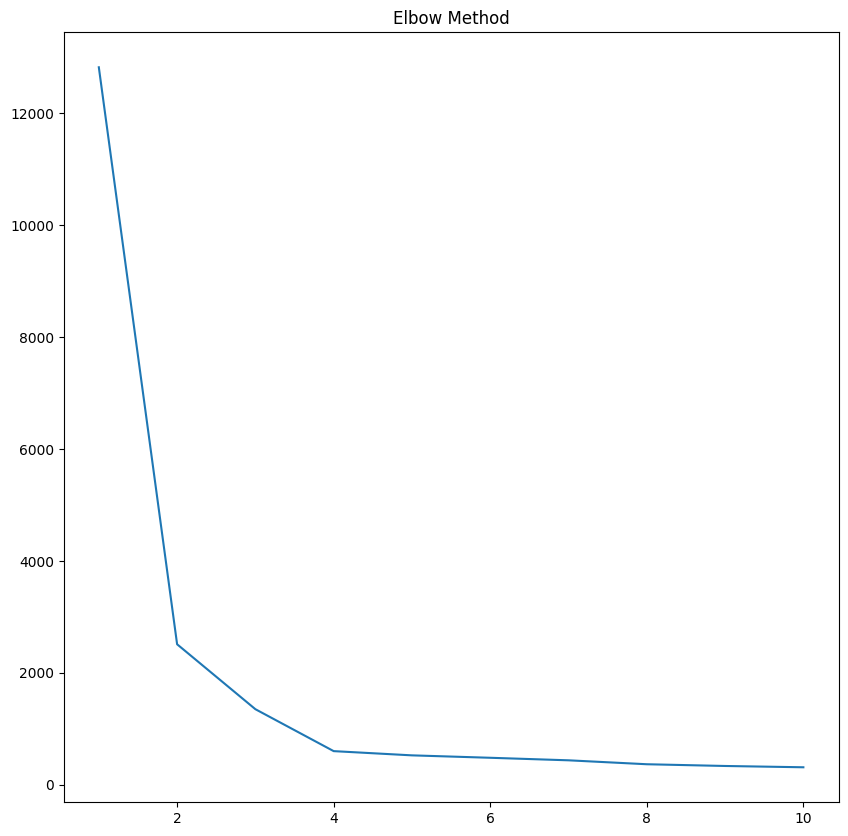

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.show()
#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/global-food.csv')
df.head()

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,700000.0,0.079635,79.63468,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007963,7.963468,45.787930,125.446382,387.08370,10.237346,5.439545
1,NaN,Afghanistan,1962,8969055.0,700000.0,0.078046,78.04613,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007805,7.804613,44.879000,122.956163,379.35650,10.029739,5.330847
2,NaN,Afghanistan,1963,9157463.0,713000.0,0.077860,77.85999,1.4260,NaN,500000.0,...,NaN,NaN,71000.0,0.007753,7.753239,44.785263,122.699349,378.59918,10.015743,5.324051
3,NaN,Afghanistan,1964,9355510.0,720000.0,0.076960,76.96000,1.4257,NaN,505000.0,...,NaN,NaN,72000.0,0.007696,7.696000,44.308723,121.393760,374.53220,9.908746,5.265616
4,NaN,Afghanistan,1965,9565154.0,720000.0,0.075273,75.27322,1.4400,NaN,500000.0,...,NaN,NaN,72000.0,0.007527,7.527323,43.336914,118.731270,366.32706,9.688275,5.145301


In [ ]:
df.describe()

,Product,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
count,0.0,13633.000000,1.359900e+04,1.213600e+04,10194.000000,10194.000000,11988.000000,0.0,1.213400e+04,10192.000000,...,10006.000000,10006.000000,1.146100e+04,11364.000000,11364.000000,12319.000000,12319.000000,12417.000000,12221.000000,12021.000000
mean,NaN,1992.280056,1.695492e+08,1.945297e+07,0.073454,73.453500,3.161411,NaN,4.863948e+06,0.028501,...,0.005963,5.962526,9.201211e+05,0.004421,4.421420,20.834987,57.082155,174.492608,4.293267,1.646202
std,NaN,17.865102,5.769052e+08,7.157314e+07,0.132957,132.957364,3.113212,NaN,1.443127e+07,0.037819,...,0.025466,25.465608,3.339276e+06,0.006631,6.630918,28.891059,79.153586,249.331071,6.310417,2.638378
min,NaN,1961.000000,1.215600e+04,0.000000e+00,0.000000,0.000000,0.000100,NaN,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1977.000000,2.358146e+06,2.350454e+04,0.004432,4.431880,1.184775,NaN,1.529625e+04,0.002432,...,0.000000,0.000000,3.000000e+03,0.000519,0.518991,2.707791,7.418605,20.064770,0.479990,0.110000
50%,NaN,1993.000000,1.009492e+07,4.009830e+05,0.027446,27.446002,1.966844,NaN,2.023400e+05,0.014143,...,0.000420,0.420107,3.300000e+04,0.002238,2.238033,9.340002,25.589046,74.070305,1.695331,0.549987
75%,NaN,2008.000000,5.267564e+07,4.973084e+06,0.078830,78.830079,4.237125,NaN,1.588182e+06,0.037793,...,0.003598,3.598366,2.220000e+05,0.005589,5.589294,26.874790,73.629561,222.720000,5.403865,1.995730
max,NaN,2022.000000,7.975105e+09,1.207996e+09,1.336795,1336.795400,36.761898,NaN,2.056942e+08,0.249444,...,0.477118,477.118370,6.378900e+07,0.106523,106.522760,173.819230,476.217064,1512.933300,39.862750,16.287899


In [ ]:
df.shape[1]

40

In [ ]:
df.columns

Index(['Product', 'Country', 'Year', 'Population', 'Production (t)',
       'production__tonnes__per_capita', 'Production per capita (kg)',
       'Yield (t/ha)', 'Yield (kg/animal)', 'Land Use (ha)',
       'area_harvested__ha__per_capita', 'Land Use per capita (m²)',
       'Producing or slaughtered animals',
       'Producing or slaughtered animals per capita', 'Imports (t)',
       'imports__tonnes__per_capita', 'Imports per capita (kg)', 'Exports (t)',
       'exports__tonnes__per_capita', 'Exports per capita (kg)',
       'Domestic supply (t)', 'domestic_supply__tonnes__per_capita',
       'Domestic supply per capita (kg)', 'Food (t)',
       'food__tonnes__per_capita', 'Food per capita (kg)', 'Animal feed (t)',
       'feed__tonnes__per_capita', 'Animal feed per capita (kg)',
       'Other uses (t)', 'other_uses__tonnes__per_capita',
       'Other uses per capita (kg)', 'Supply chain waste (t)',
       'waste_in_supply_chain__tonnes__per_capita',
       'Supply chain waste per c

In [ ]:
df.dtypes

,0
Product,float64
Country,object
Year,int64
Population,float64
Production (t),float64
production__tonnes__per_capita,float64
Production per capita (kg),float64
Yield (t/ha),float64
Yield (kg/animal),float64
Land Use (ha),float64


In [ ]:
df['Country'].value_counts()

,count
Country,
Afghanistan,62
New Zealand,62
Micronesia (FAO),62
Middle Africa (FAO),62
Morocco,62
...,...
Seychelles,12
South Sudan,11
Sudan,11


<Axes: xlabel='Country'>

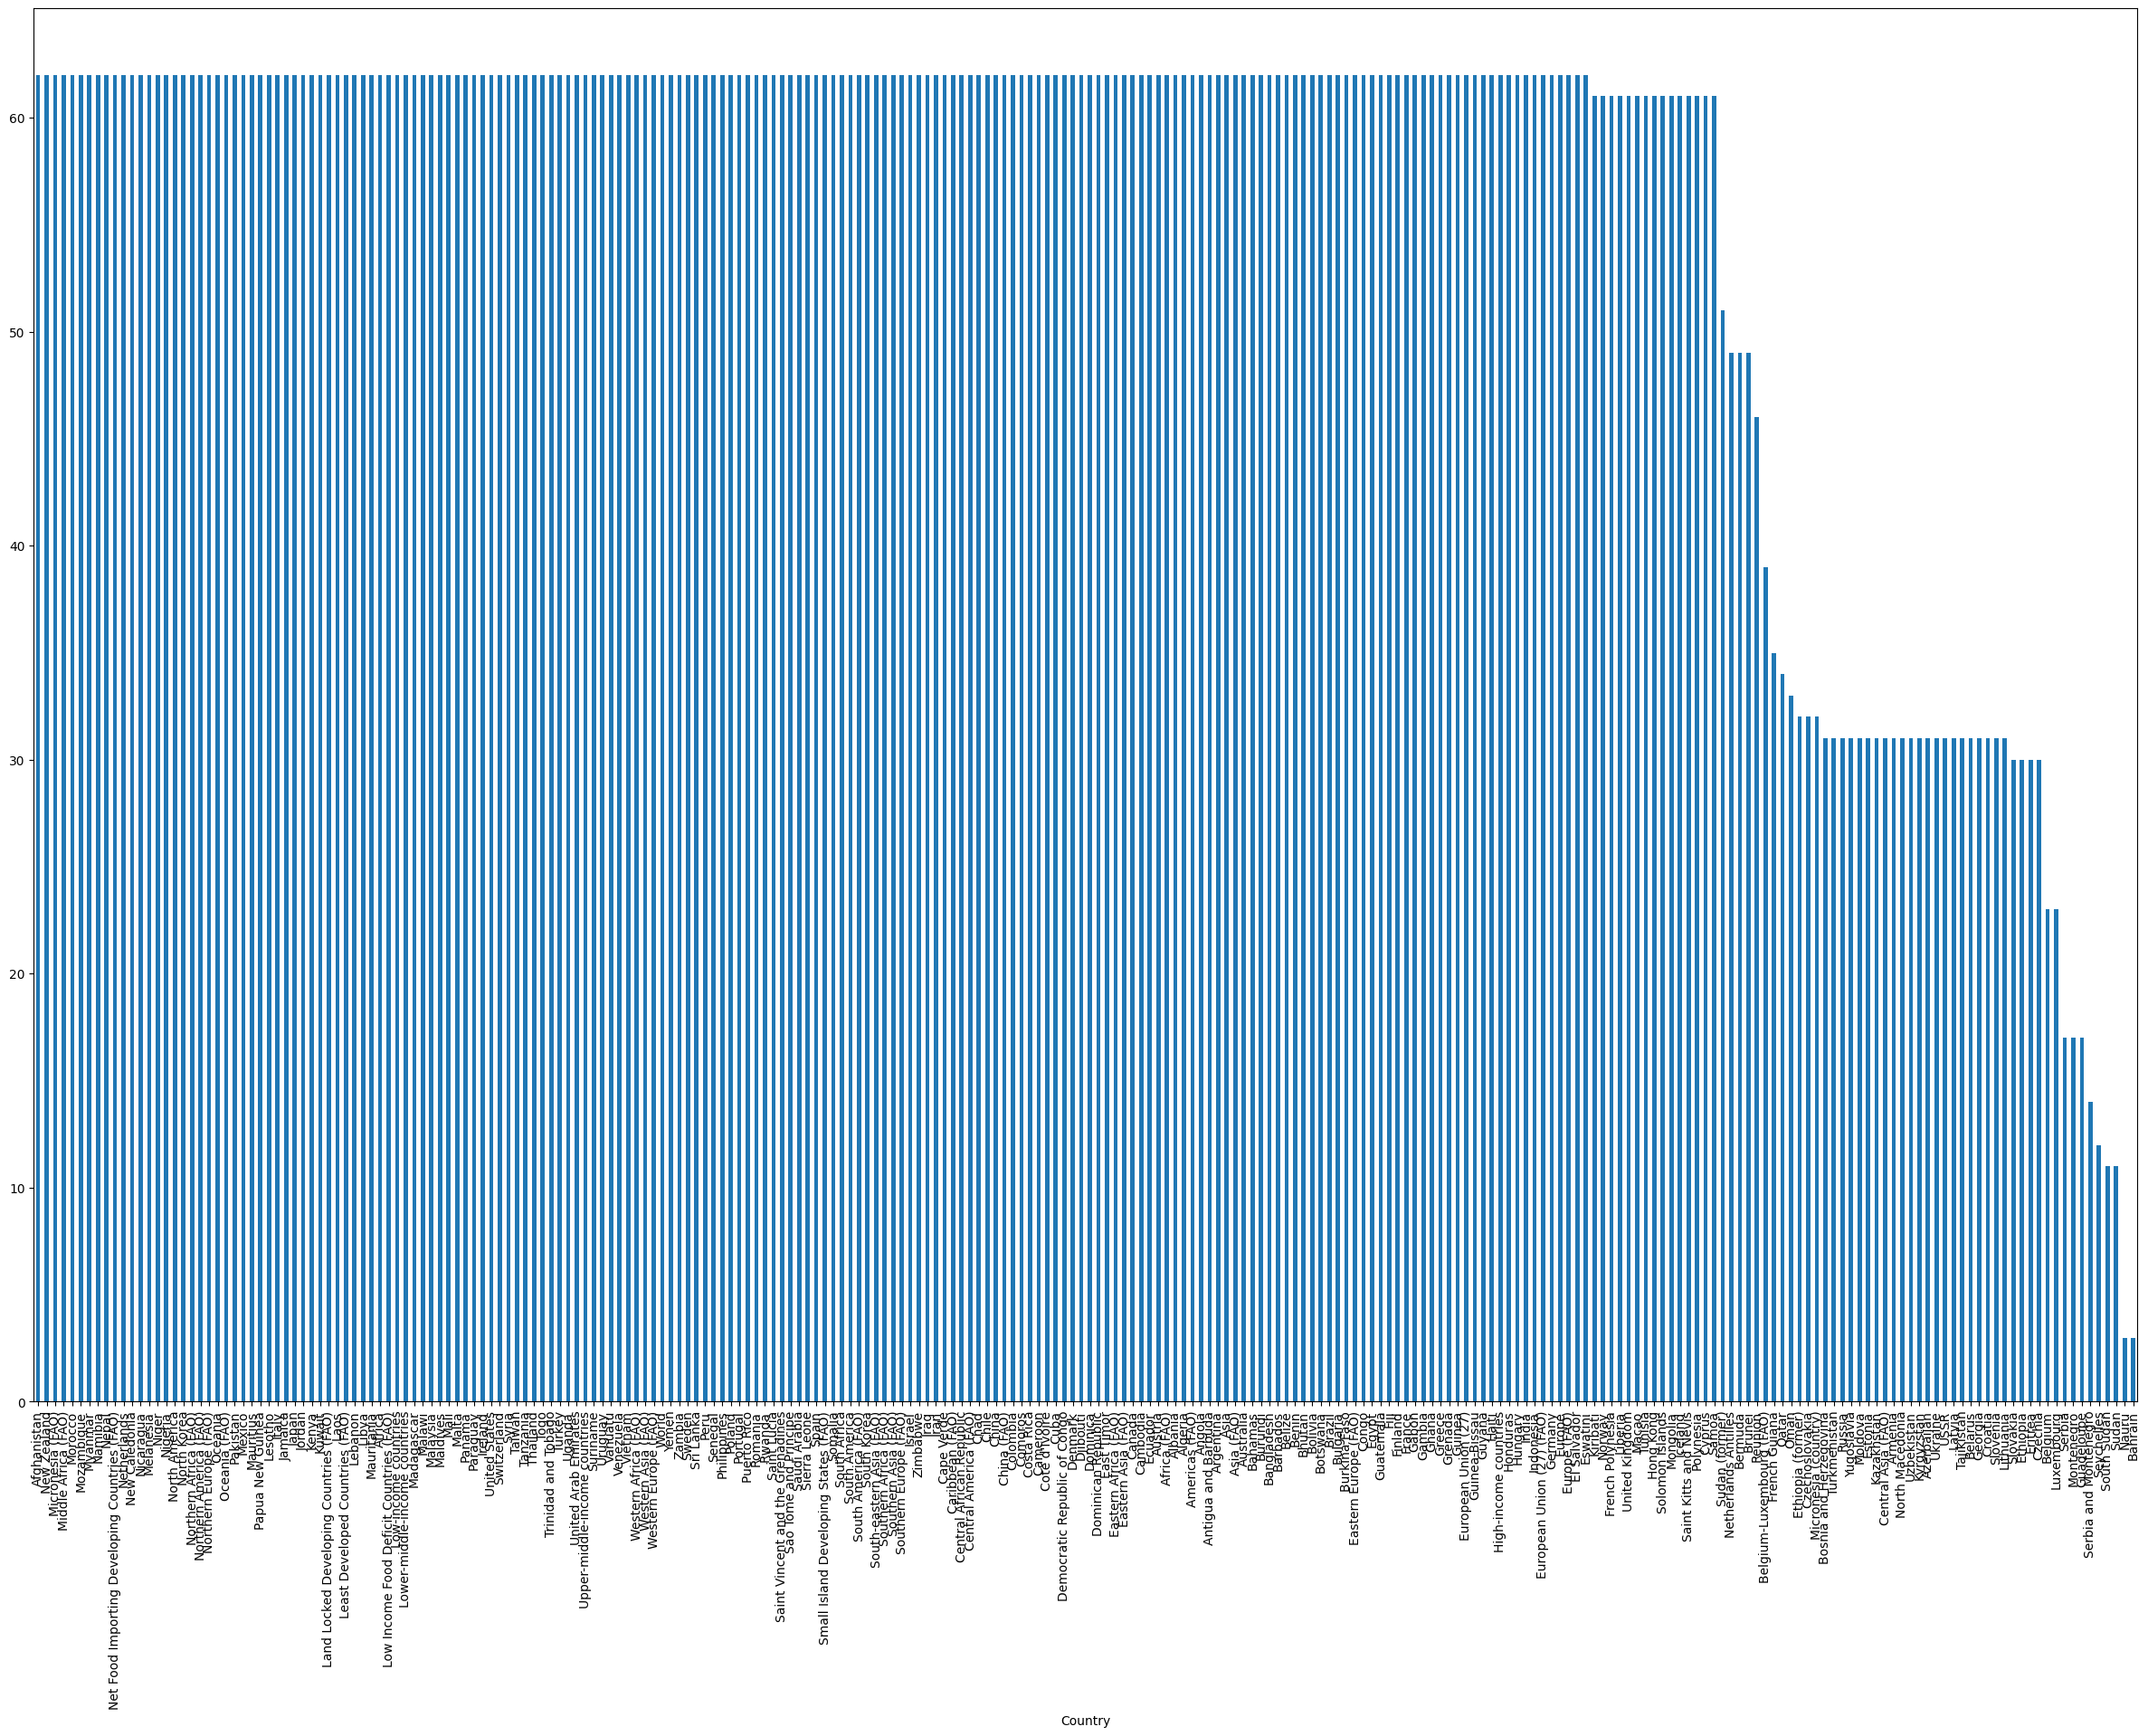

In [ ]:
plt.figure(figsize=(30, 20))
df['Country'].value_counts().plot(kind='bar')

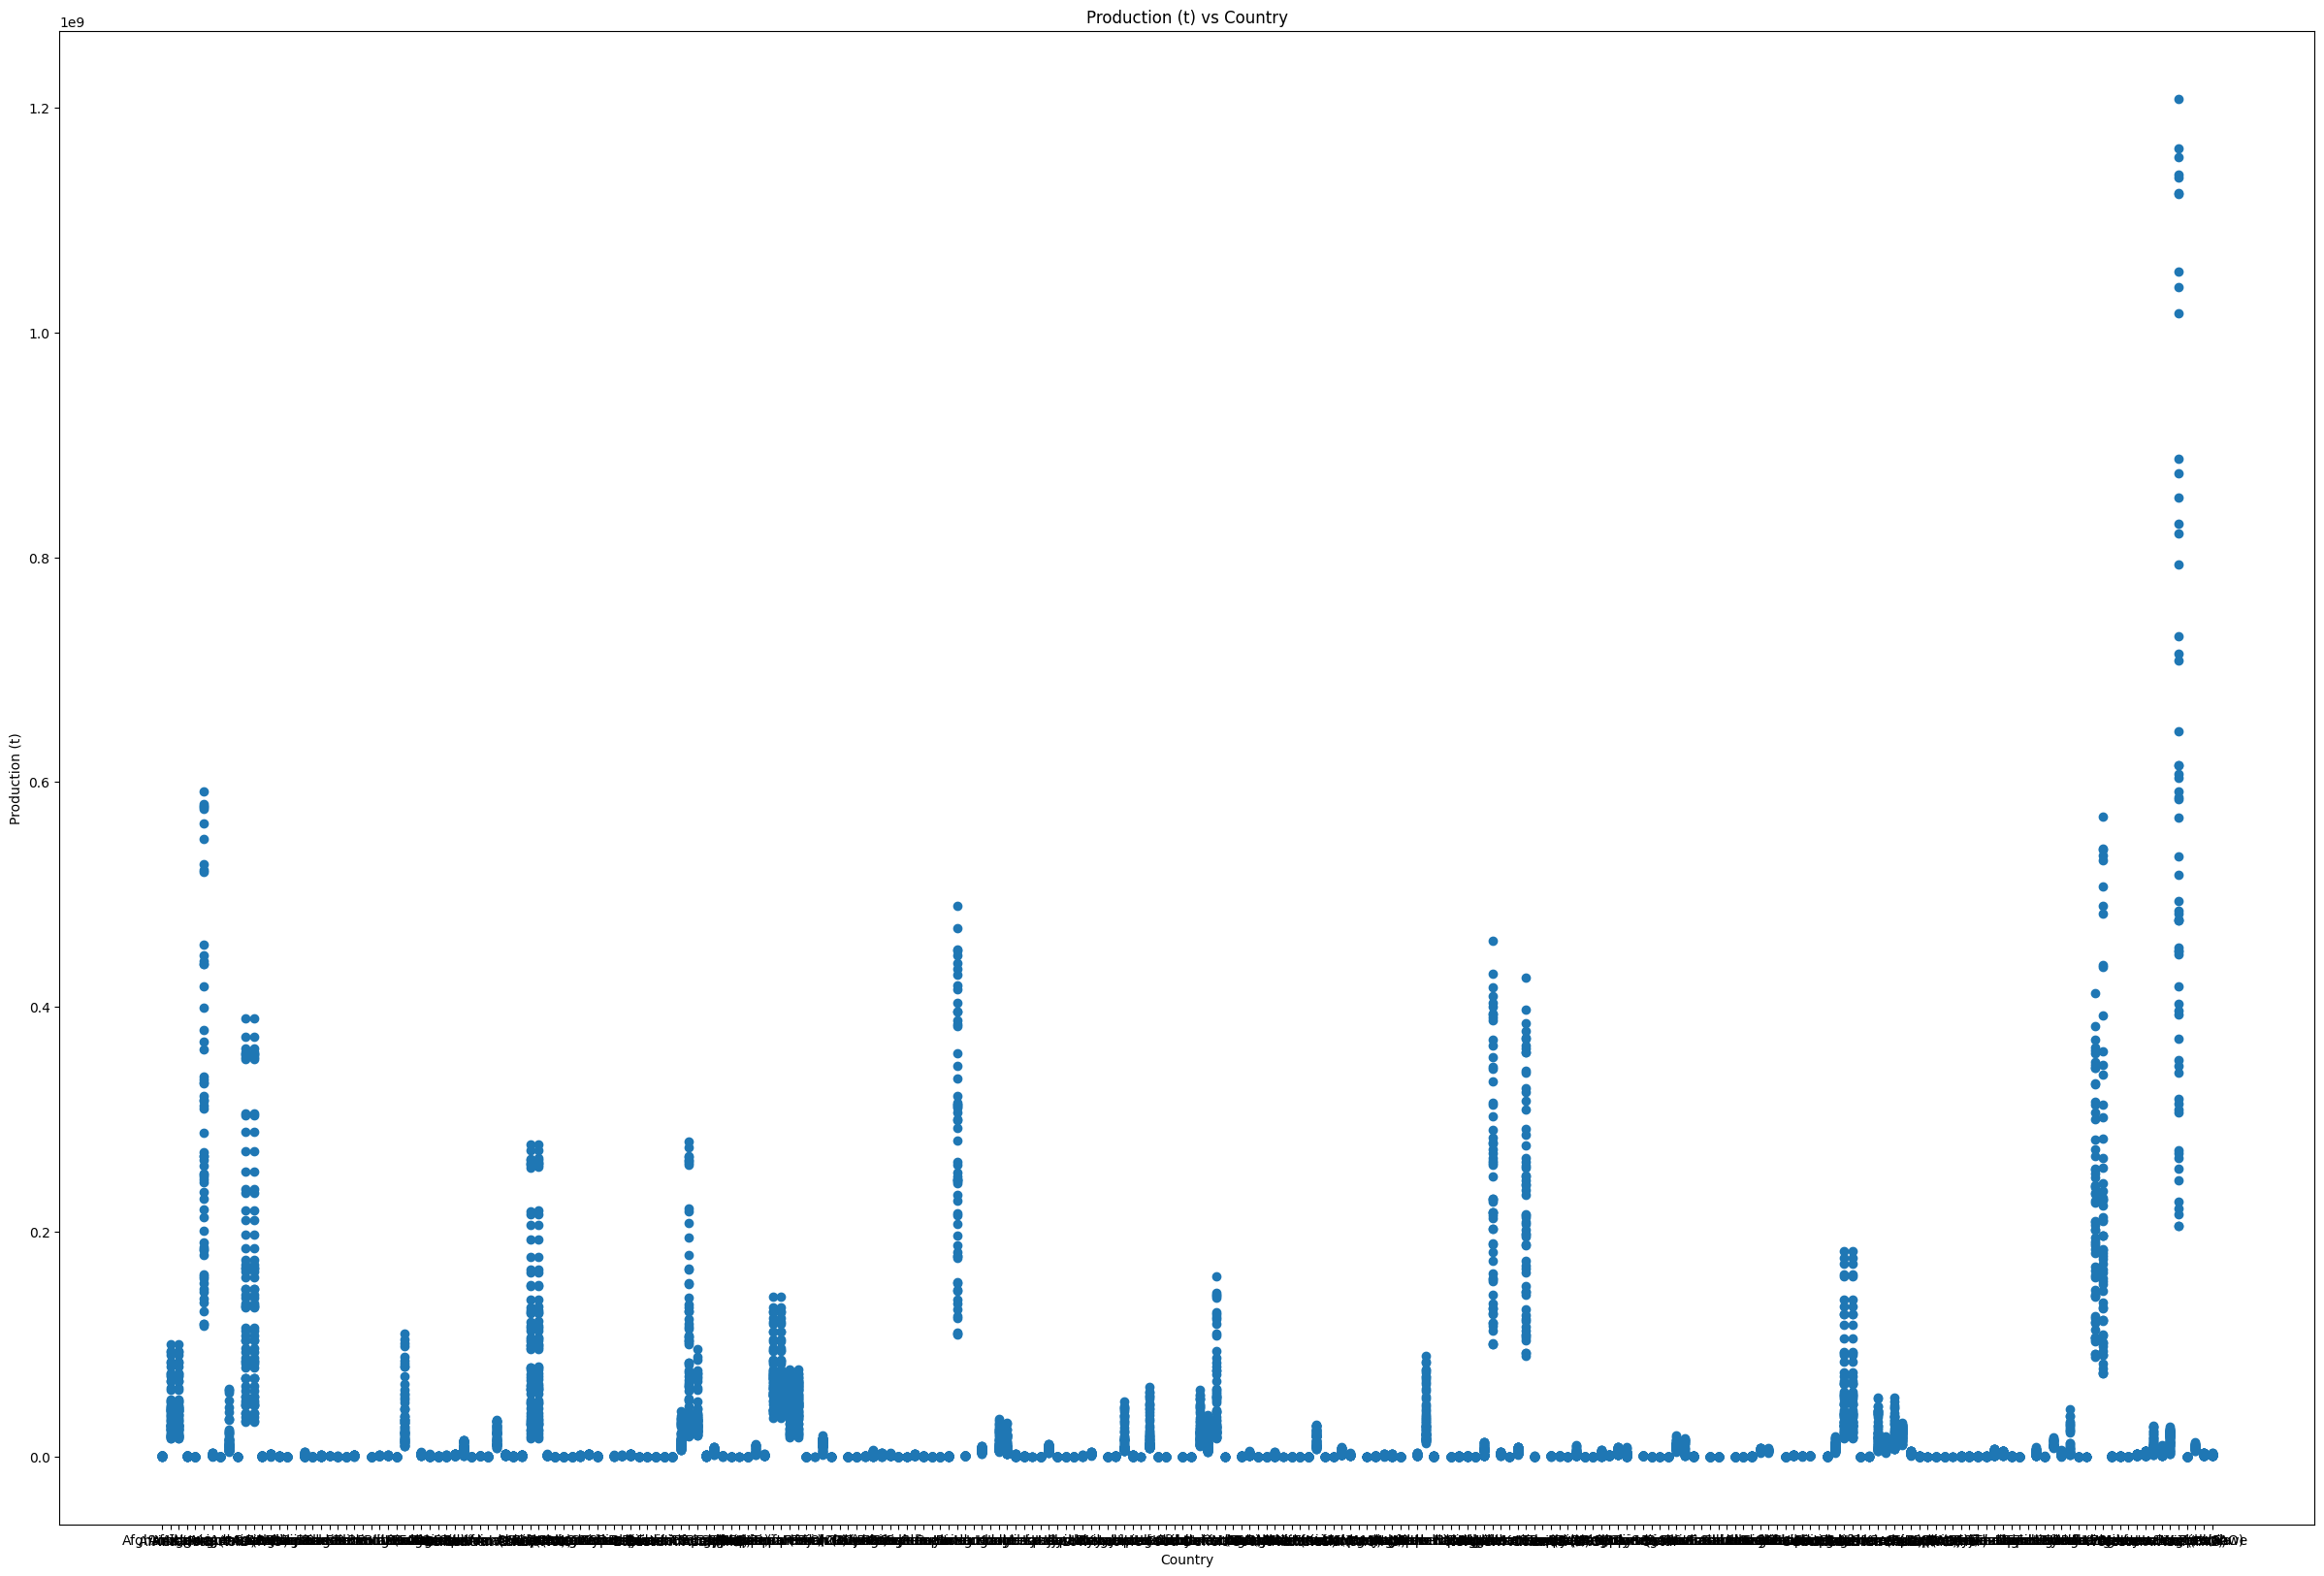

In [ ]:
plt.figure(figsize=(30, 20))
plt.scatter(df['Country'], df['Production (t)'])
plt.xlabel('Country')
plt.ylabel('Production (t)')
plt.title('Production (t) vs Country')
plt.show()

In [ ]:
import seaborn as sns

sns.pairplot(df, hue = "")

NameError: name 'df' is not defined

In [ ]:
datacolombia = df[df['Country'] == 'Colombia']
datacolombia.head()

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),Country_Encoded,Product_Encoded
2550,NaN,Colombia,1961,16182421.0,757531.0,0.046812,46.811968,1.0657,NaN,710830.0,...,12000.0,0.000742,0.741545,43.030056,117.890563,405.18353,10.199641,3.922939,46,0
2551,NaN,Colombia,1962,16691286.0,753900.0,0.045167,45.167282,1.0818,NaN,696900.0,...,11000.0,0.000659,0.659026,38.416542,105.250799,361.27835,9.087675,3.480386,46,0
2552,NaN,Colombia,1963,17210954.0,781593.0,0.045413,45.412533,1.1348,NaN,688760.0,...,12000.0,0.000697,0.697230,38.440600,105.316711,361.73407,9.099269,3.497373,46,0
2553,NaN,Colombia,1964,17739760.0,968000.0,0.054567,54.566693,1.2545,NaN,771600.0,...,15000.0,0.000846,0.845558,43.298084,118.624886,411.97183,10.443555,4.195709,46,0
2554,NaN,Colombia,1965,18275818.0,870755.0,0.047645,47.645200,1.0022,NaN,868867.0,...,13000.0,0.000711,0.711322,40.569023,111.148007,381.97840,9.616737,3.706557,46,0


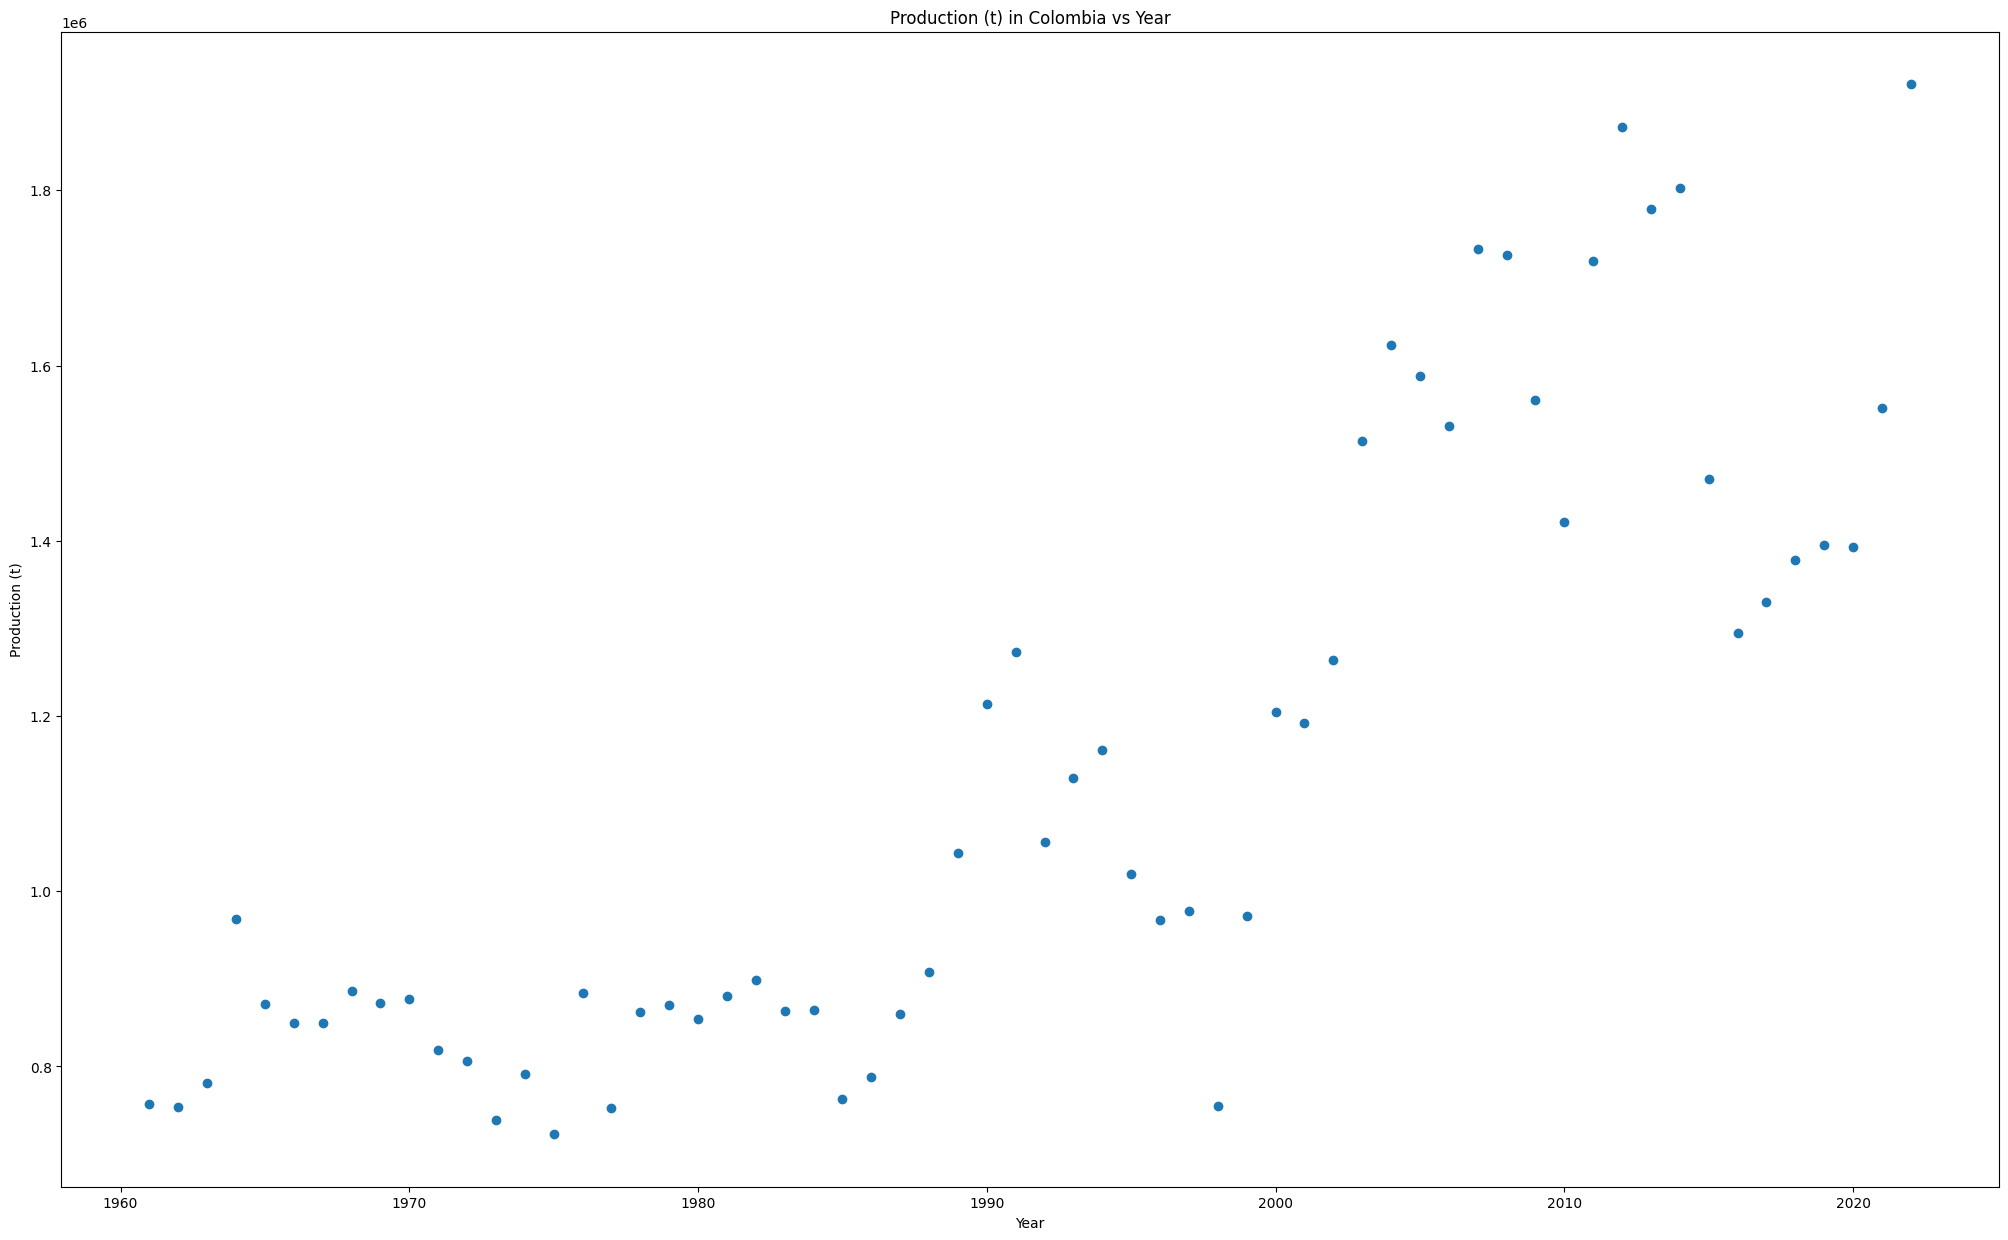

In [ ]:
plt.figure(figsize=(25, 15))
plt.scatter(datacolombia['Year'], datacolombia['Production (t)'])
plt.xlabel('Year')
plt.ylabel('Production (t)')
plt.title('Production (t) in Colombia vs Year')
plt.show()

---
---
===


# **Clase 02/10/24**

##Sobreajuste (overfitting) vs Subajuste (underfitting)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import cross_val_score

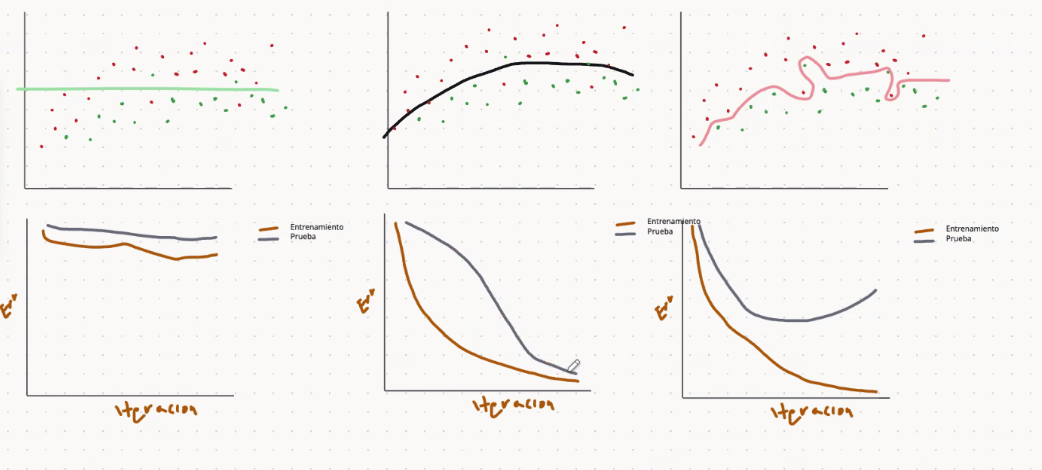

In [ ]:
X, y = make_classification(n_samples=100,  )

---
---
===


# **Clase 03/10/24**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnshTanwar/Global-Data-on-Sustainable-Energy/refs/heads/main/global-data-on-sustainable-energy%20(1).csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].median(), inplace=True)
df['gdp_per_capita'].fillna(df['gdp_per_capita'].median(), inplace=True)

<ipython-input-3-d25bcf02e3ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Access to electricity (% of population)'].fillna(df['Access to electricity (% of population)'].median(), inplace=True)
<ipython-input-3-d25bcf02e3ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [ ]:
df['Access to clean fuels for cooking'].fillna(df['Access to clean fuels for cooking'].median(), inplace=True)
df['Primary energy consumption per capita (kWh/person)'].fillna(df['Primary energy consumption per capita (kWh/person)'].median(), inplace=True)

<ipython-input-4-1824d14ffcc1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Access to clean fuels for cooking'].fillna(df['Access to clean fuels for cooking'].median(), inplace=True)
<ipython-input-4-1824d14ffcc1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [ ]:
df.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),0
Access to clean fuels for cooking,0
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),194
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


In [ ]:
# Preprocesamiento de datos para el modelo
X = df[['gdp_per_capita']]
y = df['Access to electricity (% of population)']

In [ ]:
# Dividir mis registros en segmentos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=15)

In [ ]:
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

LinearRegression()

In [ ]:
# realizar predicciones
y_predicciones = modelo.predict(X_prueba)

In [ ]:
#calcular del r2
r2 = modelo.score(X_prueba, y_prueba)
print("R2:", r2)

R2: 0.15726034036761372


In [ ]:
#rmse
rmse = np.sqrt(mean_squared_error(y_prueba, y_predicciones))
print("RMSE:", rmse)

RMSE: 27.355121268866885


In [ ]:
mae = mean_absolute_error(y_prueba, y_predicciones)
print("MAE:", mae)

MAE: 23.006828427151586


In [ ]:
n_datos_entrenamieto = len(y_entrenamiento)
n_datos_prueba = len(y_prueba)
k = X.shape[1]
print("Número de datos de prueba:", nro_datos_prueba)

Número de datos de prueba: 730


In [ ]:
r2_ajustado = 1 - ((1 - r2) * (n_datos_prueba - 1) / (n_datos_prueba - k - 1))
print("R2 ajustado:", r2_ajustado)

R2 ajustado: 0.15697143407360192


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

scores = metrics.r2_score(X, y)
print('R2 Score:',scores)


R2 Score: -0.4304923878288749


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # import the KFold class

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cv_score = cross_val_score(modelo, X, y, cv=kfold, scoring='r2')
print(cv_score)
print(cv_score.mean())

[0.14484423 0.16869549 0.16011578]
0.15788516516904486


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

scores = metrics.mean_squared_error(y_prueba, y_predicciones)
print('R2 Score:',scores)

R2 Score: 748.3026596344133
